# Session 3 Homework

In [1]:
import numpy as np
import pandas as pd
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import glob
%matplotlib inline
def plot_corr(df,cols):
    fig = plt.figure(figsize=(10,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show()
    
def plot_count(df,col,fsize,rotation=None,fillna=True):
    fig = plt.figure(figsize=fsize)
    if fillna:
        value_count = df[col].fillna('unknown').value_counts()
    sns.barplot(value_count.index,value_count.values)
    plt.xticks(rotation=rotation)
    plt.title('value counts for {}'.format(col))
    plt.show()

### Assignment 1

In [2]:
DATA_PATH = r'C:\\Users\\new-user-bookings\\'
file_names = glob.glob(os.path.join(DATA_PATH + "*.csv"))

#Function to load data
def load_data(path):
    file_names = glob.glob(os.path.join(path + "*.csv"))
    return file_names
load_data(DATA_PATH)

['C:\\\\Users\\\\new-user-bookings\\age_gender_bkts.csv',
 'C:\\\\Users\\\\new-user-bookings\\countries.csv',
 'C:\\\\Users\\\\new-user-bookings\\sessions.csv',
 'C:\\\\Users\\\\new-user-bookings\\train_users_2.csv']

### Assignment 2

In [3]:
train_df = pd.read_csv(file_names[3])
sessions_df = pd.read_csv(file_names[2])

In [4]:
#Function for checking datatype
def check_data_types(file):
    columntype = []
    for column in file:
        ct = file[column].dtype
        columntype.append(ct)
    return columntype
print(check_data_types(train_df))
print(check_data_types(sessions_df))

[dtype('O'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('float64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]
[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64')]


In [5]:
#Checking memory use before
mem_use = train_df.memory_usage().sum()/1024**3
print('Memory usage before for train_df is {:.6f} GB'.format(mem_use))
mem_use = sessions_df.memory_usage().sum()/1024**3
print('Memory usage before for sessions_df is {:.6f} GB'.format(mem_use))

Memory usage before for train_df is 0.025445 GB
Memory usage before for sessions_df is 0.472415 GB


In [6]:
#Checking Max and Min of the int data type columns
train_df['timestamp_first_active'].max(),train_df['timestamp_first_active'].min()

(20140630235824, 20090319043255)

In [7]:
train_df['age'].max(),train_df['age'].min()

(2014.0, 1.0)

In [8]:
train_df['signup_flow'].max(),train_df['signup_flow'].min()

(25, 0)

In [9]:
sessions_df['secs_elapsed'].max(),sessions_df['secs_elapsed'].min()

(1799977.0, 0.0)

In [10]:
#Checking the range of float 64,32 or 16 in python
np.finfo(np.float64).max,np.finfo(np.float64).min,np.finfo(np.float32).max,np.finfo(np.float32).min,np.finfo(np.float16).max,np.finfo(np.float16).min

(1.7976931348623157e+308,
 -1.7976931348623157e+308,
 3.4028235e+38,
 -3.4028235e+38,
 65500.0,
 -65500.0)

In [11]:
#Convert types
train_df['timestamp_first_active'] = train_df['timestamp_first_active'].astype(np.int32)
train_df['age'] = train_df['age'].astype(np.float16)
train_df['signup_flow'] = train_df['signup_flow'].astype(np.int16)
sessions_df['secs_elapsed'] = sessions_df['secs_elapsed'].astype(np.float32)

In [12]:
#Checking memory use after
mem_use = train_df.memory_usage().sum()/1024**3
print('Memory usage for train_df after is {:.6f} GB'.format(mem_use))
mem_use = sessions_df.memory_usage().sum()/1024**3
print('Memory usage for sessions_df after is {:.6f} GB'.format(mem_use))

Memory usage for train_df after is 0.022265 GB
Memory usage for sessions_df after is 0.433047 GB


### Assignment 3

In [13]:
nan_info_train = pd.DataFrame(train_df.isnull().sum()).reset_index()
nan_info_train.columns = ['col','nan_cnt']
nan_info_train.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info_train

,col,nan_cnt
3,date_first_booking,124543
5,age,87990
11,first_affiliate_tracked,6065
0,id,0
1,date_account_created,0
2,timestamp_first_active,0
4,gender,0
6,signup_method,0
7,signup_flow,0
8,language,0


In [14]:
nan_info_sessions = pd.DataFrame(sessions_df.isnull().sum()).reset_index()
nan_info_sessions.columns = ['col','nan_cnt']
nan_info_sessions.sort_values(by = 'nan_cnt',ascending=False,inplace=True)
nan_info_sessions

,col,nan_cnt
2,action_type,1126204
3,action_detail,1126204
5,secs_elapsed,136031
1,action,79626
0,user_id,34496
4,device_type,0


In [15]:
train_cols_with_missing = nan_info_train.loc[nan_info_train.nan_cnt>0].col.values
train_cols_with_missing

array(['date_first_booking', 'age', 'first_affiliate_tracked'],
      dtype=object)

In [16]:
sessions_cols_with_missing = nan_info_sessions.loc[nan_info_sessions.nan_cnt>0].col.values
sessions_cols_with_missing

array(['action_type', 'action_detail', 'secs_elapsed', 'action',
       'user_id'], dtype=object)

In [17]:
for f in train_cols_with_missing:
    print(f, train_df[f].dtype)

date_first_booking object
age float16
first_affiliate_tracked object


In [18]:
for f in sessions_cols_with_missing:
    print(f, sessions_df[f].dtype)

action_type object
action_detail object
secs_elapsed float32
action object
user_id object


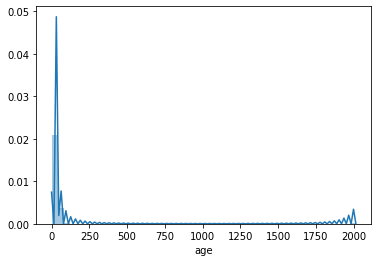

In [19]:
sns.distplot(train_df['age'].fillna(train_df['age'].median()))

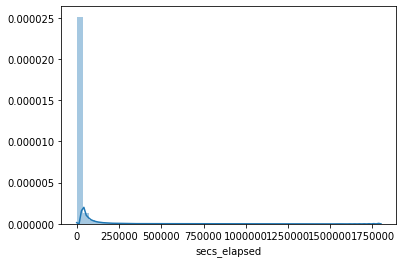

In [20]:
sns.distplot(sessions_df['secs_elapsed'].fillna(sessions_df['secs_elapsed'].mean()))

In [22]:
train_df['age'].fillna(train_df['age'].median(), inplace=True)
sessions_df['secs_elapsed'].fillna(sessions_df['secs_elapsed'].mean(), inplace=True)

### Assignment 4

In [23]:
#Subset 1
train_df['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [24]:
temp_df = train_df.loc[train_df['gender'] == 'MALE']
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,-1333835879,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
21,qsibmuz9sx,2010-01-10,-336724339,2010-01-11,MALE,30.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US
31,pggg2sj27u,2010-01-14,-332884523,NaN,MALE,31.0,basic,0,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF
33,qthj88nnc7,2010-01-14,-332770071,NaN,MALE,29.0,basic,0,en,other,craigslist,NaN,Web,Other/Unknown,-unknown-,NDF
34,x9gnxoun57,2010-01-15,-331890227,NaN,MALE,59.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF


In [25]:
#Subset 2
temp_df = train_df.loc[train_df['age'] > 18 ]
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,-1537967433,NaN,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,-1333835879,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,-1247779441,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,-825950559,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,-648949583,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [26]:
#Subset 3
train_df['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is'], dtype=object)

In [27]:
temp_df = train_df.loc[train_df['language'] == 'en' ]
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,-1537967433,NaN,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,-1333835879,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,-1247779441,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,-825950559,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,-648949583,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [28]:
#Subset 4
train_df['affiliate_provider'].unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

In [29]:
temp_df = train_df.loc[train_df['affiliate_provider'] == 'direct' ]
temp_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,-1537967433,NaN,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,-1247779441,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,-825950559,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,-648949583,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
7,0d01nltbrs,2010-01-03,-343753375,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US


In [30]:
#Subset 5
sessions_df['action'].unique()

array(['lookup', 'search_results', 'personalize', 'index',
       'similar_listings', 'ajax_refresh_subtotal', 'show',
       'header_userpic', 'ask_question', nan,
       'other_hosting_reviews_first', 'hosting_social_proof',
       'decision_tree', 'recent_reservations', 'faq_experiment_ids',
       'multi', 'active', 'dashboard', 'create', 'confirm_email',
       'show_personalize', 'verify', 'pending', 'requested', 'concierge',
       'faq', 'clear_reservation', 'cancellation_policies',
       'track_page_view', 'update', 'my', 'campaigns', 'notifications',
       'listings', 'unavailabilities', 'ajax_lwlb_contact',
       'ajax_check_dates', 'qt2', 'request_new_confirm_email',
       'ajax_photo_widget_form_iframe', 'facebook_auto_login', 'identity',
       'qt_reply_v2', 'travel_plans_current', 'complete_status',
       'populate_from_facebook', 'kba_update', 'kba', 'login',
       'authenticate', 'calendar_tab_inner2', 'other_hosting_reviews',
       'social_connections', 'relat

In [31]:
temp_df = sessions_df.loc[sessions_df['action'] == 'lookup']
temp_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


### Assignment 5

In [32]:
#Merge data
#mergeddata = train_df.merge(sessions_df.rename(columns={'user_id':'id'}),how='inner')

In [33]:
#Feature Aggregation Categorical
cat_agg_dict = {'action':['nunique'], 'action_detail':['count']}
cat_agg_df = sessions_df.rename(columns={'user_id':'id'}).groupby('id').agg(cat_agg_dict)
cat_agg_df.columns = ['{}_{}'.format(x[0],x[1]) for x in cat_agg_df.columns.tolist()]
cat_agg_df.head()

,action_nunique,action_detail_count
id,,
00023iyk9l,13,37
0010k6l0om,11,48
001wyh0pz8,10,85
0028jgx1x1,5,31
002qnbzfs5,25,712


In [34]:
#Feature Aggregation numeric
num_agg_dict = {'secs_elapsed':['mean','max','min','std','sum']}
num_agg_df = sessions_df.rename(columns={'user_id':'id'}).groupby('id').agg(num_agg_dict)
num_agg_df.columns = ['{}_{}'.format(x[0],x[1]) for x in num_agg_df.columns.tolist()]
num_agg_df.head()

,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_min,secs_elapsed_std,secs_elapsed_sum
id,,,,,
00023iyk9l,22171.607422,567165.0,0.0,91053.765625,8.868643e+05
0010k6l0om,9611.291016,127898.0,3.0,22598.775391,6.055113e+05
001wyh0pz8,3354.814453,50548.0,35.0,6741.307129,3.019333e+05
0028jgx1x1,10192.848633,84636.0,3.0,17777.101562,3.159783e+05
002qnbzfs5,8245.942383,1418284.0,0.0,58075.019531,6.506048e+06


In [35]:
#Merge categorical data
mergeddata = train_df.merge(cat_agg_df,on='id',how='inner')
mergeddata.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,action_nunique,action_detail_count
0,d1mm9tcy42,2014-01-01,999349992,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,16,90
1,yo8nz8bqcq,2014-01-01,999350614,NaN,-unknown-,34.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,7,8
2,4grx6yxeby,2014-01-01,999350695,NaN,-unknown-,34.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,12,16
3,ncf87guaf0,2014-01-01,999351202,NaN,-unknown-,34.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,19,125
4,4rvqpxoh3h,2014-01-01,999351675,2014-01-02,-unknown-,34.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,7,8


In [35]:
#Merge numeric data
mergeddata = train_df.merge(num_agg_df,on='id',how='inner')
mergeddata.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_min,secs_elapsed_std,secs_elapsed_sum
0,d1mm9tcy42,2014-01-01,999349992,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,omg,Web,Windows Desktop,Chrome,other,27137.773438,606881.000000,2.0,69089.296875,3.446497e+06
1,yo8nz8bqcq,2014-01-01,999350614,NaN,-unknown-,34.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,NDF,25201.144531,115983.000000,36.0,37048.343750,2.268103e+05
2,4grx6yxeby,2014-01-01,999350695,NaN,-unknown-,34.0,basic,0,en,sem-brand,...,omg,Web,Windows Desktop,Firefox,NDF,72150.765625,336801.000000,53.0,90514.117188,1.154412e+06
3,ncf87guaf0,2014-01-01,999351202,NaN,-unknown-,34.0,basic,0,en,direct,...,linked,Web,Windows Desktop,Chrome,NDF,24829.396484,732296.000000,0.0,84117.281250,3.774068e+06
4,4rvqpxoh3h,2014-01-01,999351675,2014-01-02,-unknown-,34.0,basic,25,en,direct,...,untracked,iOS,iPhone,-unknown-,GB,2690.413330,18968.306641,21.0,6584.032715,2.152331e+04


### Assignment 6

In [36]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [41]:
#a - concat two features
sessions_df['user_detailed_action'] = sessions_df[['action','action_type']].apply(lambda row: '_'.join(row.values.astype(str)),axis=1)

In [42]:
sessions_df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,user_detailed_action
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,lookup_nan
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,search_results_click
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,lookup_nan
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,search_results_click
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,lookup_nan


In [43]:
#b - lower case
sessions_df['device_type'].apply(lambda x: x.lower())

0           windows desktop
1           windows desktop
2           windows desktop
3           windows desktop
4           windows desktop
5           windows desktop
6           windows desktop
7           windows desktop
8           windows desktop
9           windows desktop
10          windows desktop
11          windows desktop
12          windows desktop
13          windows desktop
14          windows desktop
15          windows desktop
16          windows desktop
17          windows desktop
18          windows desktop
19          windows desktop
20          windows desktop
21          windows desktop
22          windows desktop
23          windows desktop
24          windows desktop
25          windows desktop
26          windows desktop
27          windows desktop
28          windows desktop
29          windows desktop
                 ...       
10567707        mac desktop
10567708        mac desktop
10567709        mac desktop
10567710        mac desktop
10567711        mac 

In [44]:
#bc - Upper case
sessions_df['device_type'].apply(lambda x: x.upper())

0           WINDOWS DESKTOP
1           WINDOWS DESKTOP
2           WINDOWS DESKTOP
3           WINDOWS DESKTOP
4           WINDOWS DESKTOP
5           WINDOWS DESKTOP
6           WINDOWS DESKTOP
7           WINDOWS DESKTOP
8           WINDOWS DESKTOP
9           WINDOWS DESKTOP
10          WINDOWS DESKTOP
11          WINDOWS DESKTOP
12          WINDOWS DESKTOP
13          WINDOWS DESKTOP
14          WINDOWS DESKTOP
15          WINDOWS DESKTOP
16          WINDOWS DESKTOP
17          WINDOWS DESKTOP
18          WINDOWS DESKTOP
19          WINDOWS DESKTOP
20          WINDOWS DESKTOP
21          WINDOWS DESKTOP
22          WINDOWS DESKTOP
23          WINDOWS DESKTOP
24          WINDOWS DESKTOP
25          WINDOWS DESKTOP
26          WINDOWS DESKTOP
27          WINDOWS DESKTOP
28          WINDOWS DESKTOP
29          WINDOWS DESKTOP
                 ...       
10567707        MAC DESKTOP
10567708        MAC DESKTOP
10567709        MAC DESKTOP
10567710        MAC DESKTOP
10567711        MAC 

### Assignment 7

In [45]:
train_df['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [46]:
temp_df = pd.get_dummies(train_df['gender'], prefix='gender')
print(temp_df.shape)
temp_df.head()

(213451, 4)


,gender_-unknown-,gender_FEMALE,gender_MALE,gender_OTHER
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


In [47]:
train_df = pd.concat([train_df,temp_df],axis=1)
train_df.shape

(213451, 20)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
le.fit_transform(train_df['gender'])

array([0, 2, 1, ..., 0, 0, 0])